In [27]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import models
from keras import layers
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from sklearn.metrics import classification_report, confusion_matrix
import itertools as it

%pip install nbformat
%pip install import_ipynb

import import_ipynb
import DataCleaning



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [28]:
modelGRAY = models.Sequential()
# STANDARD LAYERING TECHNIQUE:
modelGRAY.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,1)))
#32 32 1 FOR DEPTH FOR GRAY - SHOULD BE THREE FOR RGB
modelGRAY.add(layers.MaxPooling2D((2, 2)))
modelGRAY.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelGRAY.add(layers.MaxPooling2D((2, 2)))
modelGRAY.add(layers.Conv2D(64, (3, 3), activation='relu'))

modelRGB = models.Sequential()
# STANDARD LAYERING TECHNIQUE:
modelRGB.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3)))
#32 32 1 FOR DEPTH FOR GRAY - SHOULD BE THREE FOR RGB
modelRGB.add(layers.MaxPooling2D((2, 2)))
modelRGB.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelRGB.add(layers.MaxPooling2D((2, 2)))
modelRGB.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [29]:
modelGRAY.summary()
modelRGB.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-trai

In [30]:
modelGRAY.add(layers.Flatten())
modelGRAY.add(layers.Dense(64, activation='relu'))
modelGRAY.add(layers.Dense(10))

modelRGB.add(layers.Flatten())
modelRGB.add(layers.Dense(64, activation='relu'))
modelRGB.add(layers.Dense(10))

In [31]:
modelGRAY.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#DEPTH FRO GRAYSCALE WILL BE ONE AND THREE FOR RGB
history_gray = modelGRAY.fit(DataCleaning.TRAIN_GENERATOR_GRAY, epochs=10, validation_data=DataCleaning.TEST_GENERATOR_GRAY)

modelRGB.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#DEPTH FRO GRAYSCALE WILL BE ONE AND THREE FOR RGB
history_rgb = modelRGB.fit(DataCleaning.TRAIN_GENERATOR_RGB, epochs=10, validation_data=DataCleaning.TEST_GENERATOR_RGB)

Epoch 1/10


2023-11-04 17:02:31.795846: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


3122/3125 [============================>.] - ETA: 0s - loss: 0.5467 - accuracy: 0.7126

2023-11-04 17:02:52.775288: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


3125/3125 [==============================] - 24s 8ms/step - loss: 0.5465 - accuracy: 0.7127 - val_loss: 0.4990 - val_accuracy: 0.7598
Epoch 2/10
3125/3125 [==============================] - 22s 7ms/step - loss: 0.3491 - accuracy: 0.8494 - val_loss: 0.2746 - val_accuracy: 0.8885
Epoch 3/10
3125/3125 [==============================] - 22s 7ms/step - loss: 0.2880 - accuracy: 0.8795 - val_loss: 0.2591 - val_accuracy: 0.8935
Epoch 4/10
3125/3125 [==============================] - 22s 7ms/step - loss: 0.2518 - accuracy: 0.8961 - val_loss: 0.2828 - val_accuracy: 0.8784
Epoch 5/10
3125/3125 [==============================] - 22s 7ms/step - loss: 0.2326 - accuracy: 0.9052 - val_loss: 0.2480 - val_accuracy: 0.8985
Epoch 6/10
3125/3125 [==============================] - 23s 7ms/step - loss: 0.2090 - accuracy: 0.9155 - val_loss: 0.2047 - val_accuracy: 0.9169
Epoch 7/10
3125/3125 [==============================] - 24s 8ms/step - loss: 0.1974 - accuracy: 0.9203 - val_loss: 0.2635 - val_accuracy: 0.8

2023-11-04 17:06:21.539373: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


3122/3125 [============================>.] - ETA: 0s - loss: 0.5235 - accuracy: 0.7364

2023-11-04 17:06:44.174754: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


3125/3125 [==============================] - 26s 8ms/step - loss: 0.5234 - accuracy: 0.7365 - val_loss: 0.4402 - val_accuracy: 0.7935
Epoch 2/10
3125/3125 [==============================] - 24s 8ms/step - loss: 0.3586 - accuracy: 0.8433 - val_loss: 0.3924 - val_accuracy: 0.8270
Epoch 3/10
3125/3125 [==============================] - 24s 8ms/step - loss: 0.3088 - accuracy: 0.8697 - val_loss: 0.2525 - val_accuracy: 0.8960
Epoch 4/10
3125/3125 [==============================] - 23s 7ms/step - loss: 0.2542 - accuracy: 0.8959 - val_loss: 0.2386 - val_accuracy: 0.9033
Epoch 5/10
3125/3125 [==============================] - 23s 7ms/step - loss: 0.2247 - accuracy: 0.9088 - val_loss: 0.2181 - val_accuracy: 0.9126
Epoch 6/10
3125/3125 [==============================] - 24s 8ms/step - loss: 0.2003 - accuracy: 0.9199 - val_loss: 0.1994 - val_accuracy: 0.9206
Epoch 7/10
3125/3125 [==============================] - 24s 8ms/step - loss: 0.1833 - accuracy: 0.9266 - val_loss: 0.1932 - val_accuracy: 0.9

2023-11-04 17:10:18.751664: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


625/625 - 2s - loss: 0.1843 - accuracy: 0.9299 - 2s/epoch - 3ms/step


2023-11-04 17:10:20.662000: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


625/625 - 2s - loss: 0.1967 - accuracy: 0.9229 - 2s/epoch - 3ms/step


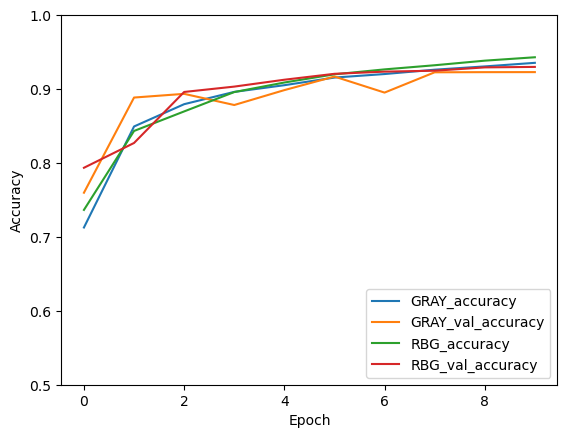

In [32]:
plt.plot(history_gray.history['accuracy'], label='GRAY_accuracy')
plt.plot(history_gray.history['val_accuracy'], label = 'GRAY_val_accuracy')
plt.plot(history_rgb.history['accuracy'], label='RBG_accuracy')
plt.plot(history_rgb.history['val_accuracy'], label = 'RBG_val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_rgb_loss, test_rgb_acc = modelRGB.evaluate(DataCleaning.TEST_GENERATOR_RGB, verbose=2)
test_gray_loss, test_gray_acc = modelGRAY.evaluate(DataCleaning.TEST_GENERATOR_GRAY, verbose=2)

In [33]:
print(test_gray_acc)
print(test_rgb_acc)

0.9229000210762024
0.9299499988555908


/var/folders/wj/f1l2kdj15vvc6y_vdgq37cqr0000gn/T/ipykernel_63511/1222278866.py:27: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred_gray = modelGRAY.predict_generator(DataCleaning.TRAIN_GENERATOR_GRAY)
2023-11-04 17:10:22.852644: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
/var/folders/wj/f1l2kdj15vvc6y_vdgq37cqr0000gn/T/ipykernel_63511/1222278866.py:30: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred_RBG = modelRGB.predict_generator(DataCleaning.TRAIN_GENERATOR_RGB)
2023-11-04 17:10:35.941274: I tensorflow/core/common_ru


Classification Report - modelGRAY

              precision    recall  f1-score   support

        FAKE       0.96      0.94      0.95     50000
        REAL       0.94      0.96      0.95     50000

    accuracy                           0.95    100000
   macro avg       0.95      0.95      0.95    100000
weighted avg       0.95      0.95      0.95    100000


Classification Report - modelRGB

              precision    recall  f1-score   support

        FAKE       0.95      0.96      0.96     50000
        REAL       0.96      0.95      0.96     50000

    accuracy                           0.96    100000
   macro avg       0.96      0.96      0.96    100000
weighted avg       0.96      0.96      0.96    100000



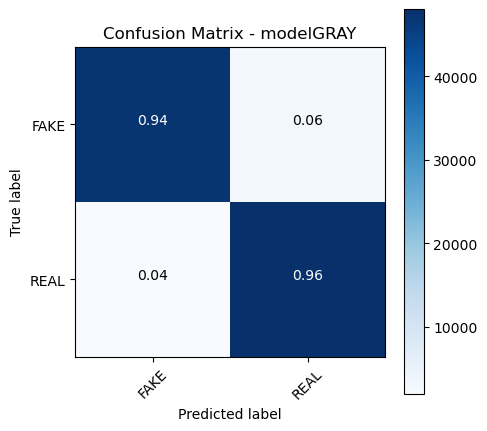

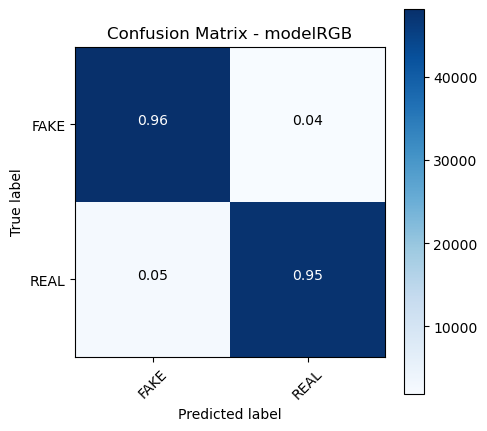

In [34]:

def plot_confusion_matrix(cm, title, target_names, cmap=plt.cm.Blues):
    
    plt.figure(figsize=(5,5))

    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)

    # NORMALIZE:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cm = np.around(cm, decimals=2)
    cm[np.isnan(cm)] = 0.0

    thresh = cm.max() / 2.
    for i, j in it.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
    # plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Y_pred_gray = modelGRAY.predict_generator(DataCleaning.TRAIN_GENERATOR_GRAY)
y_pred_gray = np.argmax(Y_pred_gray, axis=1)

Y_pred_RBG = modelRGB.predict_generator(DataCleaning.TRAIN_GENERATOR_RGB)
y_pred_RGB = np.argmax(Y_pred_RBG, axis=1)

cm_gray = confusion_matrix(DataCleaning.TRAIN_GENERATOR_GRAY.classes, y_pred_gray)
cm_RGB = confusion_matrix(DataCleaning.TRAIN_GENERATOR_RGB.classes, y_pred_RGB)

target_names_gray = []
target_names_RGB = []

for key in DataCleaning.TRAIN_GENERATOR_GRAY.class_indices:
    target_names_gray.append(key)

for key in DataCleaning.TRAIN_GENERATOR_RGB.class_indices:
    target_names_RGB.append(key)

print('\nClassification Report - modelGRAY\n')
print(classification_report(DataCleaning.TRAIN_GENERATOR_GRAY.classes, y_pred_gray, target_names=target_names_gray))

print('\nClassification Report - modelRGB\n')
print(classification_report(DataCleaning.TRAIN_GENERATOR_RGB.classes, y_pred_RGB, target_names=target_names_RGB))

plot_confusion_matrix(cm_gray,title="Confusion Matrix - modelGRAY",target_names=target_names_gray)
plot_confusion_matrix(cm_RGB,title="Confusion Matrix - modelRGB",target_names=target_names_RGB)